# Requirements

In [203]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Creating the DataSet

In [204]:
# Sepehr Moniri : 981813205

student_id = 981813205  # Your student ID
np.random.seed(student_id)

# Generate random dataset
# X, _ = make_blobs(n_samples=1000, n_features=8, centers=8, random_state=981813205)
X, _ = make_blobs(n_samples=1000, n_features=8, centers=5, random_state=student_id)

split_line = 0.8
q1 = int(np.ceil(X.shape[0] * split_line))
x_train, x_test = X[:q1], X[q1:]

# Implementing the K-Means Algorithm

In [205]:
def get_distance(x1, x2):
    # Calculating the Distance
    if x1.ndim == 1 and x2.ndim == 1:
        return np.linalg.norm(x1 - x2)
    else:
        return np.linalg.norm(x1 - x2, axis=1)

def initialize_centroids(X, n_clusters, init):
    if init == 'random':
        centroids = X[np.random.choice(X.shape[0], size=n_clusters, replace=False)]
    elif init == 'kmeans++':
        centroids = [X[np.random.choice(X.shape[0])]]
        while len(centroids) < n_clusters:
            distances = np.array([min([np.linalg.norm(x - c) for c in centroids]) for x in X])
            prob = distances / distances.sum()
            cumulative_prob = prob.cumsum()
            r = np.random.rand()
            for j, p in enumerate(cumulative_prob):
                if r < p:
                    i = j
                    break
            centroids.append(X[i])
    else:
        raise ValueError("Invalid value for init. Use 'k-means++' or 'random'.")
    return np.array(centroids)

In [206]:
def kmeans(X, n_clusters, init='random', max_iter=10):
    centroids = initialize_centroids(X, n_clusters, init)
    for _ in range(max_iter):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(n_clusters)])
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return centroids, labels


# Plotting

In [207]:
# def plot_clusters1(X, centroids, labels, counter=None):
#     if counter == None:
#       plt.figure(figsize=(8, 6))
#       plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.5, s=50)
#       plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', c='red', s=200, edgecolors='k', label='Centroids')
#       plt.title('KMeans Clustering')
#     else:
#       plt.figure(figsize=(12, 5))
#       plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.5, s=50)
#       plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', c='red', s=200, edgecolors='k', label='Centroids')
#       plt.title(f'K-Means Clustering with {n_clusters[i]} clusters')
#     plt.xlabel('Feature 1')
#     plt.ylabel('Feature 2')
#     plt.legend()
#     plt.grid(True)
#     plt.show()

def plot_clusters(X, centroids, labels, counter=None):
    if counter is None:
        plt.figure(figsize=(8, 6))
        plt.title('KMeans Clustering')
    else:
        plt.figure(figsize=(7, 5))
        plt.title(f'K-Means Clustering with {counter} clusters')

    n_clusters = centroids.shape[0]
    for i in range(n_clusters):
        plt.scatter(X[labels == i, 0], X[labels == i, 1], label=f'Cluster {i+1}')
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', label='Centroids')



    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()

# Algorithm setup and Learning

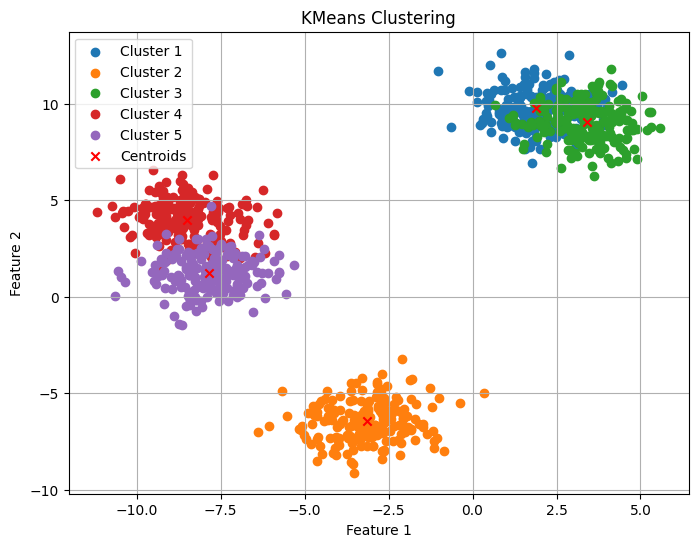

In [208]:
# n_clusters = 8
# KMeansPP_centers, KMeansPP_labels = kmeans(X, n_clusters=8, init='k-means++', max_iter=10, random_state=981813205)

n_clusters = 5
centroids, labels = kmeans(X, n_clusters=n_clusters, init='kmeans++', max_iter=100)
# centroids, labels = kmeans(X, n_clusters=n_clusters, init='random', max_iter=10)

plot_clusters(X, centroids, labels)
# plot_clusters1(X, centroids, labels)

In [209]:
# n_clusters = 7
# random_centers, random_labels = kmeans(X, n_clusters, init='random', max_iter=10, random_state=981813205)

# # visualiing
# plt.figure(figsize=(7, 5))
# for i in range(n_clusters):
#     plt.scatter(X[random_labels == i, 0], X[random_labels == i, 1], label=f'Cluster {i+1}')
# plt.scatter(random_centers[:, 0], random_centers[:, 1], marker='x', color='red', label='Centroids')
# plt.title('K-Means Clustering')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.legend()
# plt.show()

# Test different numbers for k

In [210]:
n_clusters_list = [4, 5, 6, 7, 8, 9]
results = []
for n in n_clusters_list:
    test_centroids, test_labels = kmeans(X, n_clusters=n, init='kmeans++', max_iter=10)

    results.append([test_centroids, test_labels])

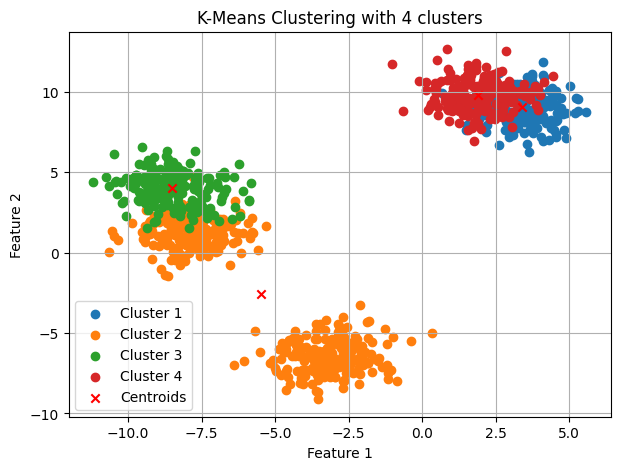

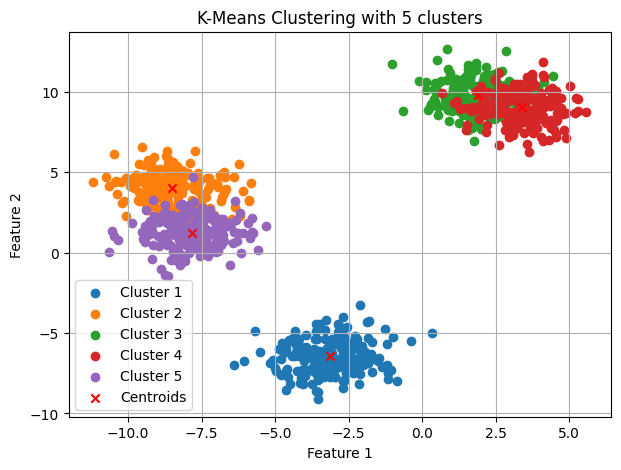

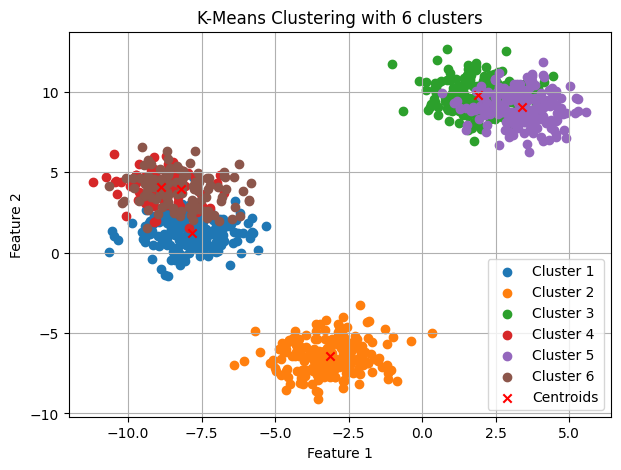

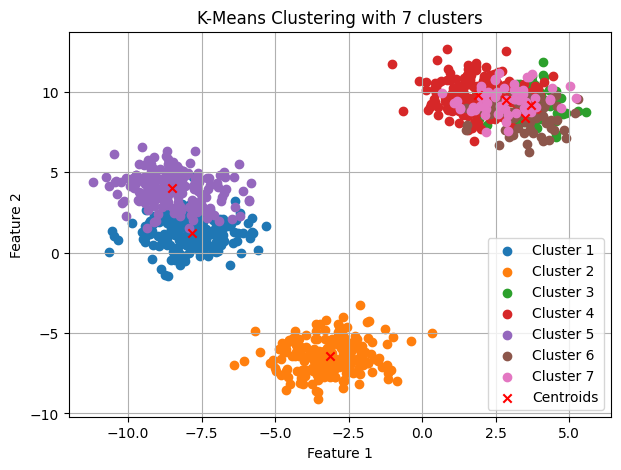

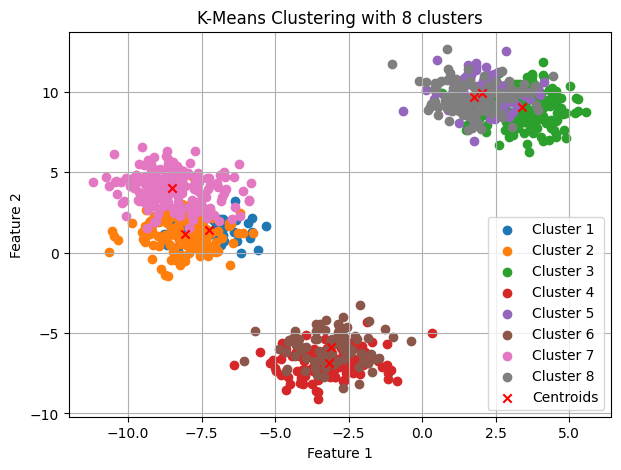

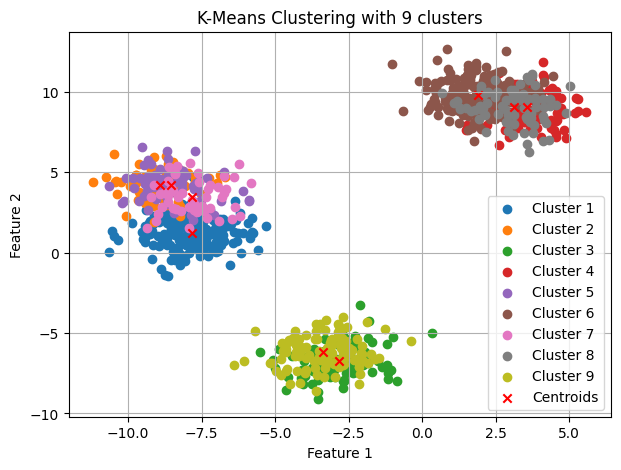

In [211]:
for i in range(len(results)):
    tcentroids = results[i][0]
    tlabels = results[i][1]
    plot_clusters(X, tcentroids, tlabels, counter=n_clusters_list[i])

so we guess the best number of cluster is 5.

# Validation

In [212]:
def calculate_wcss(X, n_clusters_range):
    wcss = []
    for n_clusters in n_clusters_range:
        # centers, labels = kmeans(X, n_clusters, init='k-means++', max_iter=100, random_state=981813205)
        centroids, labels = kmeans(X, n_clusters=n_clusters, init='kmeans++', max_iter=100)
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        cluster_distances = np.min(distances, axis=1)
        wcss.append(np.sum(cluster_distances ** 2))
    return wcss

In [213]:
# Random dataset
X, _ = make_blobs(n_samples=1000, n_features=8, centers=4, random_state=981813205)

n_clusters_range = range(1, 11)

wcss_values = calculate_wcss(X, n_clusters_range)
for i in range(len(n_clusters_range)):
    print(f'For k = {n_clusters_range[i]}, result of Elbow Method is {wcss_values[i]}')

For k = 1, result of Elbow Method is 191192.41819344938
For k = 2, result of Elbow Method is 121494.89768952892
For k = 3, result of Elbow Method is 68547.81449342293
For k = 4, result of Elbow Method is 8074.1116242762055
For k = 5, result of Elbow Method is 7855.964415609997
For k = 6, result of Elbow Method is 7676.521611373703
For k = 7, result of Elbow Method is 7523.654523967333
For k = 8, result of Elbow Method is 7383.578316840963
For k = 9, result of Elbow Method is 7172.425337172877
For k = 10, result of Elbow Method is 7172.422420171851


The graph for the result of elbow method is like this: 


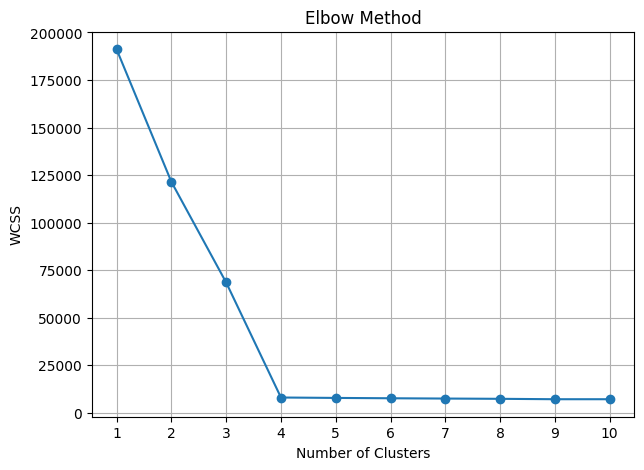

In [214]:
# visualing
print('The graph for the result of elbow method is like this: ')
plt.figure(figsize=(7, 5))
plt.plot(n_clusters_range, wcss_values, marker='o', linestyle='-')
# plt.plot(n_clusters_range, elbow_method, marker='o', linestyle='-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(n_clusters_range)
plt.grid(True)
plt.show()

So we can conclude that k>=4 is the best number of k.